In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pprint import pprint
import math
import time


data1=pd.read_csv('E:/SEMESTER 6/ML-CS60050/Assgnment/Third/AllBooks_baseline_DTM_Labelled.csv') #importing the data
n=len(data1.axes[0]) #to find number of rows in each attribute

data1.drop([13], inplace = True) # removing "Buddhism_Ch14" from Dataframe

data1.reset_index(drop=True, inplace=True) # to adjust indices accordingly

data1["Unnamed: 0"]=data1["Unnamed: 0"].str.replace(r'_Ch', '') # to remove "_Ch" 
data1["Unnamed: 0"] = data1["Unnamed: 0"].str.replace('\d+', '') # to remove number after book name
print(data1.iloc[0:20,0:5])

data2=data1.drop(data1.columns[0],axis='columns')
data=data2.iloc[:,:].values
data=np.array(data)  # tranforming into numpy array
data=np.float64(data)   
num_rows=data.shape[0]
num_columns=data.shape[1]
for j in range(0,num_columns):  
    count=0
    for i in range(0,num_rows):
    	count+=data[i][j]
    for i in range(0,num_rows):
        data[i][j]=1.0*data[i][j]*math.log(1.0*(1+num_rows)/(1+count))
for i in range(0,num_rows):   #Normalizing each datapoint by dividing by the magnitude
	magnitude=0
	for j in range(0,num_columns):
		magnitude+=data[i][j]*data[i][j]
	magnitude=math.sqrt(magnitude)
	if(magnitude==0):  #There is a single point data point with magnitude zero or which contains an empty row
		continue
	for j in range(0,num_columns):
		data[i][j]/=magnitude
# Data can be used for furthur calculations
print("\n \n print final value of data: ")
print(data[0:15,0:15])

   Unnamed: 0  foolishness  hath  wholesome  takest
0    Buddhism            0     0          0       0
1    Buddhism            0     0          0       0
2    Buddhism            0     0          0       0
3    Buddhism            0     0          0       0
4    Buddhism            0     0          0       0
5    Buddhism            0     0          0       0
6    Buddhism            0     0          0       0
7    Buddhism            0     0          0       0
8    Buddhism            0     0          0       0
9    Buddhism            0     0          0       0
10   Buddhism            0     0          0       0
11   Buddhism            0     0          0       0
12   Buddhism            0     0          0       0
13   Buddhism            0     0          0       0
14   Buddhism            0     0          0       0
15   Buddhism            0     0          0       0
16   Buddhism            0     0          0       0
17   Buddhism            0     0          0       0
18   Buddhis

In [2]:
def distance(centroids,data,K):
    distance1=np.ones(K)
    for i in range(K):
        distance1[i]=np.dot(centroids[i],data) # centroid was not normalise so we need to normlised it.
        dinominator=np.sqrt(np.dot(centroids[i],centroids[i])*np.dot(data,data)) # data was already normalised so np.dot(data,data)=1.
        distance1[i]=distance1[i]/dinominator
    return(np.exp(-distance1))

In [3]:
K=8  # to obtain K=8 clusters of documents
iterations=300
num_rows1=data.shape[0]
num_columns1=data.shape[1]

centroids=np.random.rand(K,num_columns1)

In [12]:

belongs_to=np.ones(len(data))
SSE=np.zeros(iterations)

for itr in range(iterations):
    for i in range(len(data)):
        distances=distance(centroids,data[i],K)

        SSE[itr]+=(distances.sum())

        min_dist_index=0
        min_dist=distances[0]
        for j in range(1,K):
            if(distances[j]<min_dist):
                min_dist=distances[j]
                min_dist_index=j

        belongs_to[i]=min_dist_index


    centroids[:]=0
    count=np.zeros(K)
    for i in range(len(belongs_to)):
        centroids[int(belongs_to[i])]+=data[i]
        count[int(belongs_to[i])]+=1

    for i in range(K):
        if(count[i]!=0):
            centroids[i]/=count[i]

        
    cluster=[[],[],[],[],[],[],[],[]]
    for i in range(len(belongs_to)):
        cluster[int(belongs_to[i])].append(i)
        
    sorted_cluster=sorted(cluster)
        
#return(sorted_cluster,centroids,SSE)

In [13]:
Output=sorted_cluster
print(Output)

[[0, 2, 9, 13, 16, 21, 26, 27, 34, 42, 60, 68, 78, 80, 81, 88, 89, 96, 105, 138, 140, 151, 158, 161, 162, 180, 185, 210, 215, 226, 246, 253, 287, 295, 321, 336, 343, 347, 357, 358, 369, 372, 383, 388, 401, 405, 412, 413, 415, 417, 428, 436, 438, 446, 456, 473, 476], [1, 3, 11, 20, 24, 32, 45, 62, 76, 103, 106, 111, 117, 129, 143, 152, 178, 188, 191, 208, 212, 213, 224, 230, 254, 258, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 284, 294, 315, 328, 367, 368, 380, 382, 392, 407, 408, 431, 440, 442, 451], [4, 8, 14, 23, 25, 30, 33, 36, 43, 44, 53, 54, 58, 67, 95, 98, 102, 104, 120, 125, 141, 145, 148, 156, 190, 194, 195, 197, 198, 199, 200, 203, 204, 207, 233, 234, 241, 244, 245, 247, 248, 255, 256, 310, 314, 326, 329, 338, 340, 345, 355, 361, 373, 384, 391, 404, 411, 422, 435, 460, 467], [5, 6, 7, 12, 19, 22, 46, 47, 52, 57, 59, 72, 74, 85, 90, 97, 99, 109, 126, 128, 135, 147, 179, 182, 189, 216, 217, 223, 229, 250, 291, 293, 301, 304, 305, 316, 331, 334, 335, 339, 344, 348, 352, 35

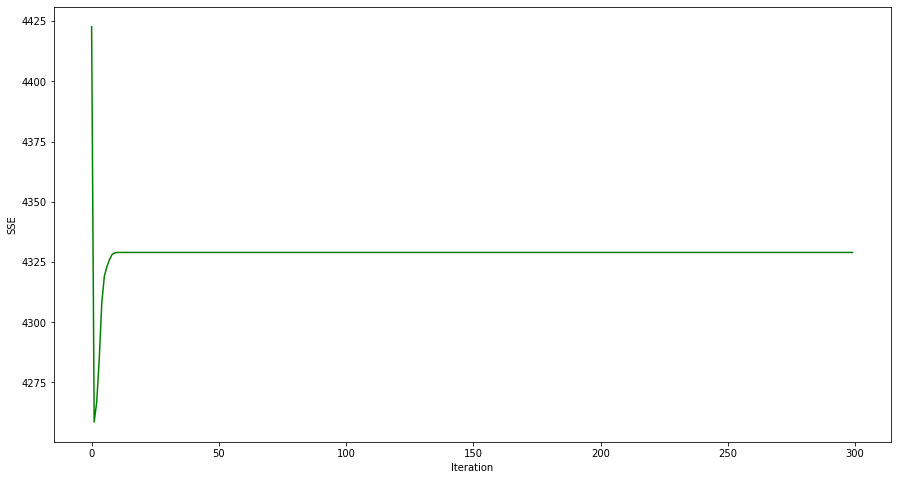

In [6]:
#import matplotlib.pyplot as plt
plt.figure(figsize=[15,8])
plt.plot(range(iterations),SSE,c='g')
plt.xlabel('Iteration')
plt.ylabel('SSE')
plt.show()

In [7]:
f=open("E:/SEMESTER 6/ML-CS60050/Assgnment/Third/kmeans.txt",'w')
for i in range(8):
    for j in sorted_cluster[i]:
        f.write(str(j))
        f.write(",")
    f.write("\n")
f.close()

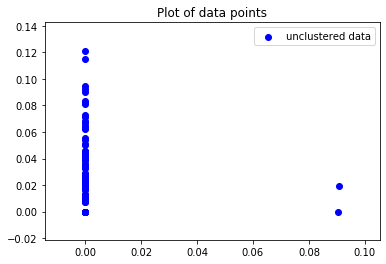

In [8]:
plt.scatter(data[:,0],data[:,1],c='blue',label='unclustered data')
#plt.xlabel('Rows')
#plt.ylabel('columns')
plt.legend()
plt.title('Plot of data points')
plt.show()

In [9]:
#print(np.dot(data[1],data[1]))

In [10]:
#f.write


In [11]:
print(len(sorted_cluster))

8
